In [37]:
import nltk #import library nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [38]:
pip install sastrawi #install sastrawi

In [39]:
import string #import library
import tweepy
import pandas as pd
import csv
import re

from nltk.corpus import stopwords #import library
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#prepare key
token_data = open('data_key.csv')
tokens = csv.reader(token_data, delimiter=',')

data_token = [row[2] for row in tokens]
consumer_key = data_token[0]
consumer_secret = data_token[1]
access_token = data_token[2]
access_token_secret = data_token[3]

#handler autentikasi
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


stopwords = set(stopwords.words('indonesian')) #define stopwords
tweet_jokowi = api.user_timeline(id = 'jokowi', count= 20, tweet_mode='extended') #retrive tweet from account jokowi

data_list_baru = [] #create new list to place retrived tweet
for tweet in tweet_jokowi:
  tweet = tweet.full_text.translate(str.maketrans("","",string.punctuation)) #remove punctuation
  tweet = tweet.lower() #convert text to lowercase
  tweet = re.sub(r"\d+", "", tweet) #remove number
  tweet = tweet.strip() #remove whitespace
  tweet = tweet.split() #split words
  tweet = [word for word in tweet if word not in stopwords] #remove stopwords
  tweet = ' '.join(tweet) #join new words without stopwords
  data_list_baru.append(tweet) #append data to data_list_baru


data_list = data_list_baru #save data_list_baru to new variable data_list
data_list #view data_list



['januari daya beli masyarakat konsumsi rumah tangga daya ungkit memacu pertumbuhan ekonomi bansos disalurkan sasaran perbaikan data pemerintah daerah dilibatkan potongan bentuk apapun',
 'apbn pemerintah rp triliun program perlindungan sosial kartu sembako program keluarga harapan bansos tunai kartu prakerja dana desa diskon listrik memerintahkan bansos disalurkan januari httpstcoqvvgyuahpz',
 'pemerintah membangun bendungan tanah air bendungan rajui aceh titab bali bajulmati jawa timur raknamo ntt tapin kalimantan selatan pembangunan bendungan ikhtiar berdaulat bidang pangan httpstcooathgdujp',
 'natal tahuntahun keceriaan keriaan menyelimuti kehidupan negeri pandemi mengubah pelajaran semoga kedamaian keselamatan keberkahan senantiasa mengiringi langkah httpstcoepulvwstj',
 'internet informasi panduan penanganan pasien covid puskesmas pulau weh sabang desember pemerintah menuntaskan penyediaan akses internet fasilitas pelayanan kesehatan membutuhkan optimalisasi layanan internet htt

In [40]:
import itertools #import library
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

data_list_new = [word_tokenize(paragraf) for paragraf in data_list] #divide data per word
data_list_new_2 = list(itertools.chain(*data_list_new)) #gather data into one list


fqdist = FreqDist(data_list_new_2) #calculate frequency per words
print(fqdist.most_common(10)) #display top 10 most appear words

[('indonesia', 9), ('pelabuhan', 6), ('pemerintah', 5), ('membangun', 5), ('tri', 5), ('pandemi', 4), ('adi', 4), ('utarini', 4), ('masyarakat', 3), ('bansos', 3)]


In [41]:
pip install wordcloud #install wordcloud

In [42]:
from wordcloud import WordCloud #import library
import matplotlib.pyplot as plt

data_list_new_3 = ' '.join(data_list_new_2) #join new data list
print(data_list_new_3) #print new data list

januari daya beli masyarakat konsumsi rumah tangga daya ungkit memacu pertumbuhan ekonomi bansos disalurkan sasaran perbaikan data pemerintah daerah dilibatkan potongan bentuk apapun apbn pemerintah rp triliun program perlindungan sosial kartu sembako program keluarga harapan bansos tunai kartu prakerja dana desa diskon listrik memerintahkan bansos disalurkan januari httpstcoqvvgyuahpz pemerintah membangun bendungan tanah air bendungan rajui aceh titab bali bajulmati jawa timur raknamo ntt tapin kalimantan selatan pembangunan bendungan ikhtiar berdaulat bidang pangan httpstcooathgdujp natal tahuntahun keceriaan keriaan menyelimuti kehidupan negeri pandemi mengubah pelajaran semoga kedamaian keselamatan keberkahan senantiasa mengiringi langkah httpstcoepulvwstj internet informasi panduan penanganan pasien covid puskesmas pulau weh sabang desember pemerintah menuntaskan penyediaan akses internet fasilitas pelayanan kesehatan membutuhkan optimalisasi layanan internet httpstcoqwcxegq resmi

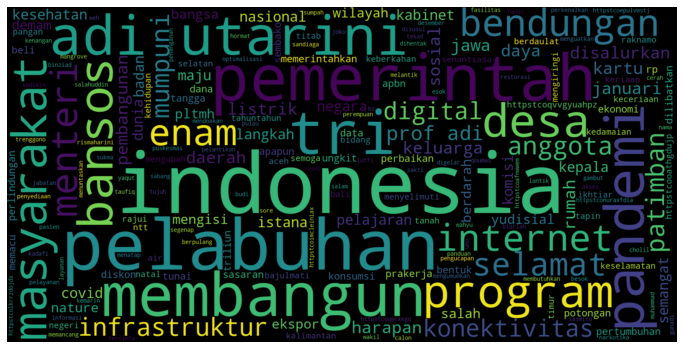

In [43]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(data_list_new_3) #create wordcloud visualization
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()